## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 726s 4us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out]) 
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.75,0.55]
Nesterov=[True,False]

In [9]:
import itertools

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr,mom,nets in itertools.product(LEARNING_RATE,MOMENTUM,Nesterov):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=nets, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s-nesterov-%s" % (str(lr), str(mom),str(nets))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 14s 286us/step - loss: 1.4792 - accuracy: 0.4820 - val_loss: 1.7222 - val_accuracy: 0.4208
Epoch 49/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.4785 - accuracy: 0.4792 - val_loss: 1.6547 - val_accuracy: 0.4257
Epoch 50/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.4833 - accuracy: 0.4763 - val_loss: 1.6564 - val_accuracy: 0.4304
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 247us/step - loss: 2.0079 - accuracy: 0.2325 - val_loss: 2.0267 - val_accuracy: 0.2389
Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.0061 - accuracy: 0.2314 - val_loss: 2.0083 - val_accuracy: 0.2292
Epoch 47/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9647 - accuracy: 0.2399 - val_loss: 1.9921 - val_accuracy: 0.2320
Epoch 48/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.9464 - accuracy: 0.2508 - val_loss: 1.9330 - val_accuracy: 0.2461
Epoch 49/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9616 - accuracy: 0.2498 - val_loss: 1.9952 - val_accuracy: 0.2274
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.9624 - accuracy: 0.2459 - val_loss: 2.0415 - val_accuracy: 0.2442
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 15s 303us/step - loss: 0.8561 - accuracy: 0.6890 - val_loss: 1.7909 - val_accuracy: 0.4746
Epoch 43/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.8364 - accuracy: 0.6960 - val_loss: 1.7110 - val_accuracy: 0.5015
Epoch 44/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.8254 - accuracy: 0.6993 - val_loss: 1.8280 - val_accuracy: 0.4898
Epoch 45/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.8165 - accuracy: 0.7036 - val_loss: 1.8012 - val_accuracy: 0.4853
Epoch 46/50
50000/50000 [==============================] - 16s 313us/step - loss: 0.8019 - accuracy: 0.7100 - val_loss: 1.8238 - val_accuracy: 0.4921
Epoch 47/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.7951 - accuracy: 0.7120 - val_loss: 1.7825 - val_accuracy: 0.4947
Epoch 48/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.7871 - accuracy: 0.7133 - va

50000/50000 [==============================] - 12s 250us/step - loss: 0.8810 - accuracy: 0.6803 - val_loss: 1.5947 - val_accuracy: 0.5067
Epoch 40/50
50000/50000 [==============================] - 13s 258us/step - loss: 0.8825 - accuracy: 0.6800 - val_loss: 1.7148 - val_accuracy: 0.4927
Epoch 41/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.8450 - accuracy: 0.6938 - val_loss: 1.6803 - val_accuracy: 0.5027
Epoch 42/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.8392 - accuracy: 0.6954 - val_loss: 1.6667 - val_accuracy: 0.4978
Epoch 43/50
50000/50000 [==============================] - 12s 248us/step - loss: 0.8332 - accuracy: 0.6970 - val_loss: 1.7643 - val_accuracy: 0.4879
Epoch 44/50
50000/50000 [==============================] - 13s 260us/step - loss: 0.8261 - accuracy: 0.7003 - val_loss: 1.7449 - val_accuracy: 0.5012
Epoch 45/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.7988 - accuracy: 0.7104 - va

50000/50000 [==============================] - 16s 318us/step - loss: 0.9306 - accuracy: 0.6653 - val_loss: 1.7583 - val_accuracy: 0.4430
Epoch 37/50
50000/50000 [==============================] - 15s 308us/step - loss: 0.9109 - accuracy: 0.6747 - val_loss: 1.5555 - val_accuracy: 0.5052
Epoch 38/50
50000/50000 [==============================] - 17s 335us/step - loss: 0.8852 - accuracy: 0.6824 - val_loss: 1.7969 - val_accuracy: 0.4491
Epoch 39/50
50000/50000 [==============================] - 15s 301us/step - loss: 0.8802 - accuracy: 0.6840 - val_loss: 1.6128 - val_accuracy: 0.4858
Epoch 40/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.8627 - accuracy: 0.6896 - val_loss: 1.7363 - val_accuracy: 0.4829
Epoch 41/50
50000/50000 [==============================] - 15s 301us/step - loss: 0.8443 - accuracy: 0.6992 - val_loss: 1.6437 - val_accuracy: 0.4962
Epoch 42/50
50000/50000 [==============================] - 15s 299us/step - loss: 0.8343 - accuracy: 0.7002 - va

50000/50000 [==============================] - 12s 242us/step - loss: 0.8861 - accuracy: 0.6824 - val_loss: 1.5792 - val_accuracy: 0.4967
Epoch 34/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.8738 - accuracy: 0.6891 - val_loss: 1.7841 - val_accuracy: 0.4696
Epoch 35/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.8538 - accuracy: 0.6924 - val_loss: 1.7380 - val_accuracy: 0.4808
Epoch 36/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8356 - accuracy: 0.7009 - val_loss: 1.5876 - val_accuracy: 0.5038
Epoch 37/50
50000/50000 [==============================] - 14s 282us/step - loss: 0.8170 - accuracy: 0.7071 - val_loss: 1.7011 - val_accuracy: 0.4845
Epoch 38/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.8024 - accuracy: 0.7095 - val_loss: 1.6838 - val_accuracy: 0.5010
Epoch 39/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.7735 - accuracy: 0.7244 - va

50000/50000 [==============================] - 15s 294us/step - loss: 0.7323 - accuracy: 0.7376 - val_loss: 1.5098 - val_accuracy: 0.5354
Epoch 31/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.7091 - accuracy: 0.7468 - val_loss: 1.5926 - val_accuracy: 0.5269
Epoch 32/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.6881 - accuracy: 0.7548 - val_loss: 1.5752 - val_accuracy: 0.5416
Epoch 33/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.6648 - accuracy: 0.7621 - val_loss: 1.6636 - val_accuracy: 0.5269
Epoch 34/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.6341 - accuracy: 0.7716 - val_loss: 1.6141 - val_accuracy: 0.5355
Epoch 35/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.6169 - accuracy: 0.7804 - val_loss: 1.8168 - val_accuracy: 0.5152
Epoch 36/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.6065 - accuracy: 0.7829 - va

50000/50000 [==============================] - 12s 233us/step - loss: 0.9686 - accuracy: 0.6542 - val_loss: 1.3672 - val_accuracy: 0.5313
Epoch 28/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.9543 - accuracy: 0.6562 - val_loss: 1.3596 - val_accuracy: 0.5375
Epoch 29/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.9510 - accuracy: 0.6589 - val_loss: 1.4174 - val_accuracy: 0.5257
Epoch 30/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.9142 - accuracy: 0.6734 - val_loss: 1.3913 - val_accuracy: 0.5443
Epoch 31/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.9141 - accuracy: 0.6720 - val_loss: 1.3929 - val_accuracy: 0.5336
Epoch 32/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.8836 - accuracy: 0.6826 - val_loss: 1.4141 - val_accuracy: 0.5445
Epoch 33/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.8625 - accuracy: 0.6909 - va

50000/50000 [==============================] - 14s 284us/step - loss: 1.1412 - accuracy: 0.5978 - val_loss: 1.3669 - val_accuracy: 0.5152
Epoch 25/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.1220 - accuracy: 0.6044 - val_loss: 1.3596 - val_accuracy: 0.5279
Epoch 26/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.1096 - accuracy: 0.6085 - val_loss: 1.3435 - val_accuracy: 0.5297
Epoch 27/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.0921 - accuracy: 0.6170 - val_loss: 1.3671 - val_accuracy: 0.5148
Epoch 28/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.0763 - accuracy: 0.6186 - val_loss: 1.4110 - val_accuracy: 0.5123
Epoch 29/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.0648 - accuracy: 0.6253 - val_loss: 1.4418 - val_accuracy: 0.5045
Epoch 30/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.0483 - accuracy: 0.6303 - va

50000/50000 [==============================] - 12s 235us/step - loss: 1.1896 - accuracy: 0.5806 - val_loss: 1.3810 - val_accuracy: 0.5161
Epoch 22/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.1719 - accuracy: 0.5853 - val_loss: 1.4036 - val_accuracy: 0.5002
Epoch 23/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.1594 - accuracy: 0.5871 - val_loss: 1.3574 - val_accuracy: 0.5141
Epoch 24/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.1417 - accuracy: 0.5975 - val_loss: 1.3242 - val_accuracy: 0.5318
Epoch 25/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.1254 - accuracy: 0.6023 - val_loss: 1.3207 - val_accuracy: 0.5362
Epoch 26/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.1098 - accuracy: 0.6071 - val_loss: 1.3215 - val_accuracy: 0.5290
Epoch 27/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.0932 - accuracy: 0.6138 - va

50000/50000 [==============================] - 14s 280us/step - loss: 1.3592 - accuracy: 0.5206 - val_loss: 1.6847 - val_accuracy: 0.4142
Epoch 19/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.3416 - accuracy: 0.5288 - val_loss: 1.5066 - val_accuracy: 0.4637
Epoch 20/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.3249 - accuracy: 0.5361 - val_loss: 1.5054 - val_accuracy: 0.4608
Epoch 21/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.3179 - accuracy: 0.5348 - val_loss: 1.4819 - val_accuracy: 0.4754
Epoch 22/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.3025 - accuracy: 0.5420 - val_loss: 1.4367 - val_accuracy: 0.4860
Epoch 23/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.2938 - accuracy: 0.5451 - val_loss: 1.4412 - val_accuracy: 0.4836
Epoch 24/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.2765 - accuracy: 0.5522 - va

50000/50000 [==============================] - 11s 216us/step - loss: 1.3750 - accuracy: 0.5179 - val_loss: 1.4138 - val_accuracy: 0.4957
Epoch 16/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.3587 - accuracy: 0.5226 - val_loss: 1.4749 - val_accuracy: 0.4756
Epoch 17/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3415 - accuracy: 0.5294 - val_loss: 1.6061 - val_accuracy: 0.4354
Epoch 18/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3287 - accuracy: 0.5302 - val_loss: 1.5018 - val_accuracy: 0.4703
Epoch 19/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.3086 - accuracy: 0.5399 - val_loss: 1.4858 - val_accuracy: 0.4666
Epoch 20/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2980 - accuracy: 0.5447 - val_loss: 1.3982 - val_accuracy: 0.5050
Epoch 21/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2844 - accuracy: 0.5495 - va

50000/50000 [==============================] - 13s 256us/step - loss: 1.4075 - accuracy: 0.5039 - val_loss: 1.4419 - val_accuracy: 0.4880
Epoch 13/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.3877 - accuracy: 0.5115 - val_loss: 1.4307 - val_accuracy: 0.4911
Epoch 14/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.3663 - accuracy: 0.5190 - val_loss: 1.4238 - val_accuracy: 0.4888
Epoch 15/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.3458 - accuracy: 0.5279 - val_loss: 1.4258 - val_accuracy: 0.4833
Epoch 16/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.3286 - accuracy: 0.5314 - val_loss: 1.3907 - val_accuracy: 0.5010
Epoch 17/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.3086 - accuracy: 0.5379 - val_loss: 1.3801 - val_accuracy: 0.5077
Epoch 18/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2912 - accuracy: 0.5434 - va

50000/50000 [==============================] - 11s 220us/step - loss: 1.5187 - accuracy: 0.4645 - val_loss: 1.5214 - val_accuracy: 0.4576
Epoch 10/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4915 - accuracy: 0.4751 - val_loss: 1.5045 - val_accuracy: 0.4657
Epoch 11/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4719 - accuracy: 0.4823 - val_loss: 1.5037 - val_accuracy: 0.4647
Epoch 12/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4488 - accuracy: 0.4878 - val_loss: 1.4755 - val_accuracy: 0.4757
Epoch 13/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4326 - accuracy: 0.4947 - val_loss: 1.4834 - val_accuracy: 0.4742
Epoch 14/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.4111 - accuracy: 0.5007 - val_loss: 1.4701 - val_accuracy: 0.4786
Epoch 15/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.4005 - accuracy: 0.5048 - va

50000/50000 [==============================] - 13s 265us/step - loss: 1.8048 - accuracy: 0.3677 - val_loss: 1.7972 - val_accuracy: 0.3679
Epoch 7/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.7803 - accuracy: 0.3772 - val_loss: 1.7729 - val_accuracy: 0.3835
Epoch 8/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7595 - accuracy: 0.3836 - val_loss: 1.7544 - val_accuracy: 0.3876
Epoch 9/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.7408 - accuracy: 0.3910 - val_loss: 1.7370 - val_accuracy: 0.3925
Epoch 10/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.7238 - accuracy: 0.3966 - val_loss: 1.7182 - val_accuracy: 0.3992
Epoch 11/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7082 - accuracy: 0.4028 - val_loss: 1.7033 - val_accuracy: 0.4024
Epoch 12/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.6929 - accuracy: 0.4077 - val_l

50000/50000 [==============================] - 11s 224us/step - loss: 1.9393 - accuracy: 0.3266 - val_loss: 1.9024 - val_accuracy: 0.3326
Epoch 4/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.8828 - accuracy: 0.3447 - val_loss: 1.8575 - val_accuracy: 0.3464
Epoch 5/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8422 - accuracy: 0.3577 - val_loss: 1.8257 - val_accuracy: 0.3629
Epoch 6/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.8123 - accuracy: 0.3675 - val_loss: 1.8002 - val_accuracy: 0.3668
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7877 - accuracy: 0.3744 - val_loss: 1.7748 - val_accuracy: 0.3785
Epoch 8/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.7666 - accuracy: 0.3805 - val_loss: 1.7593 - val_accuracy: 0.3875
Epoch 9/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7484 - accuracy: 0.3875 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 272us/step - loss: 2.2355 - accuracy: 0.1897 - val_loss: 2.1607 - val_accuracy: 0.2486
Epoch 2/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1113 - accuracy: 0.2619 - val_loss: 2.0668 - val_accuracy: 0.2740
Epoch 3/50
50000/50000 [==============================] - 14s 276us/step - loss: 2.0324 - accuracy: 0.2866 - val_loss: 2.0019 - val_accuracy: 0.2966
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.9769 - accuracy: 0.3060 - val_loss: 1.9551 - val_accuracy: 0.3165
Epoch 5/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.9354 - accuracy: 0.3227 - val_loss: 1.9204 - val_accuracy: 0.3291
Epoch 6/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.9035 - accuracy: 0.3335 - val_loss: 1.8928 - val_accuracy: 0.3387
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 381us/step - loss: 2.2120 - accuracy: 0.2003 - val_loss: 2.1341 - val_accuracy: 0.2467
Epoch 2/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.0848 - accuracy: 0.2773 - val_loss: 2.0419 - val_accuracy: 0.2799
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0074 - accuracy: 0.3022 - val_loss: 1.9763 - val_accuracy: 0.3129
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.9545 - accuracy: 0.3196 - val_loss: 1.9326 - val_accuracy: 0.3236
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.9172 - accuracy: 0.3319 - val_loss: 1.9011 - val_accuracy: 0.3367
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8884 - accuracy: 0.3422 - val_loss: 1.8775 - val_accuracy: 0.3487
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.2459 - accuracy: 0.1733 - val_loss: 2.1666 - val_accuracy: 0.2362
Epoch 2/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.1152 - accuracy: 0.2571 - val_loss: 2.0701 - val_accuracy: 0.2807
Epoch 3/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.0360 - accuracy: 0.2934 - val_loss: 2.0065 - val_accuracy: 0.3031
Epoch 4/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.9821 - accuracy: 0.3104 - val_loss: 1.9629 - val_accuracy: 0.3196
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.9423 - accuracy: 0.3232 - val_loss: 1.9290 - val_accuracy: 0.3270
Epoch 6/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.9110 - accuracy: 0.3340 - val_loss: 1.9016 - val_accuracy: 0.3386
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.2441 - accuracy: 0.1692 - val_loss: 2.1727 - val_accuracy: 0.2261
Epoch 2/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.1257 - accuracy: 0.2560 - val_loss: 2.0842 - val_accuracy: 0.2735
Epoch 3/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.0493 - accuracy: 0.2928 - val_loss: 2.0167 - val_accuracy: 0.3046
Epoch 4/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.9900 - accuracy: 0.3140 - val_loss: 1.9652 - val_accuracy: 0.3225
Epoch 5/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.9441 - accuracy: 0.3300 - val_loss: 1.9269 - val_accuracy: 0.3287
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.9095 - accuracy: 0.3378 - val_loss: 1.8970 - val_accuracy: 0.3414
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 305us/step - loss: 2.3131 - accuracy: 0.1153 - val_loss: 2.2729 - val_accuracy: 0.1546
Epoch 2/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.2560 - accuracy: 0.1643 - val_loss: 2.2381 - val_accuracy: 0.1832
Epoch 3/50
50000/50000 [==============================] - 14s 277us/step - loss: 2.2246 - accuracy: 0.1926 - val_loss: 2.2094 - val_accuracy: 0.2057
Epoch 4/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.1977 - accuracy: 0.2132 - val_loss: 2.1842 - val_accuracy: 0.2212
Epoch 5/50
50000/50000 [==============================] - 14s 283us/step - loss: 2.1736 - accuracy: 0.2265 - val_loss: 2.1613 - val_accuracy: 0.2319
Epoch 6/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.1519 - accuracy: 0.2380 - val_loss: 2.1408 - val_accuracy: 0.2440
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.3086 - accuracy: 0.1347 - val_loss: 2.2594 - val_accuracy: 0.1685
Epoch 2/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2423 - accuracy: 0.1815 - val_loss: 2.2265 - val_accuracy: 0.1917
Epoch 3/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.2133 - accuracy: 0.2062 - val_loss: 2.2009 - val_accuracy: 0.2104
Epoch 4/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.1887 - accuracy: 0.2216 - val_loss: 2.1780 - val_accuracy: 0.2280
Epoch 5/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.1660 - accuracy: 0.2355 - val_loss: 2.1565 - val_accuracy: 0.2351
Epoch 6/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.1445 - accuracy: 0.2436 - val_loss: 2.1359 - val_accuracy: 0.2441
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.3303 - accuracy: 0.1202 - val_loss: 2.2916 - val_accuracy: 0.1423
Epoch 2/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.2774 - accuracy: 0.1481 - val_loss: 2.2599 - val_accuracy: 0.1660
Epoch 3/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.2518 - accuracy: 0.1664 - val_loss: 2.2385 - val_accuracy: 0.1819
Epoch 4/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.2319 - accuracy: 0.1838 - val_loss: 2.2202 - val_accuracy: 0.1956
Epoch 5/50
50000/50000 [==============================] - 14s 282us/step - loss: 2.2141 - accuracy: 0.1964 - val_loss: 2.2035 - val_accuracy: 0.2082
Epoch 6/50
50000/50000 [==============================] - 14s 283us/step - loss: 2.1980 - accuracy: 0.2084 - val_loss: 2.1882 - val_accuracy: 0.2170
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.3260 - accuracy: 0.1108 - val_loss: 2.2969 - val_accuracy: 0.1324
Epoch 2/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.2833 - accuracy: 0.1407 - val_loss: 2.2712 - val_accuracy: 0.1505
Epoch 3/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.2609 - accuracy: 0.1568 - val_loss: 2.2513 - val_accuracy: 0.1683
Epoch 4/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.2426 - accuracy: 0.1736 - val_loss: 2.2345 - val_accuracy: 0.1861
Epoch 5/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.2270 - accuracy: 0.1881 - val_loss: 2.2199 - val_accuracy: 0.2014
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2131 - accuracy: 0.2032 - val_loss: 2.2065 - val_accuracy: 0.2138
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.3334 - accuracy: 0.1318 - val_loss: 2.3040 - val_accuracy: 0.1351
Epoch 2/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.2885 - accuracy: 0.1339 - val_loss: 2.2777 - val_accuracy: 0.1362
Epoch 3/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.2682 - accuracy: 0.1436 - val_loss: 2.2608 - val_accuracy: 0.1475
Epoch 4/50
50000/50000 [==============================] - 14s 289us/step - loss: 2.2527 - accuracy: 0.1570 - val_loss: 2.2462 - val_accuracy: 0.1661
Epoch 5/50
50000/50000 [==============================] - 14s 286us/step - loss: 2.2388 - accuracy: 0.1712 - val_loss: 2.2328 - val_accuracy: 0.1855
Epoch 6/50
50000/50000 [==============================] - 14s 286us/step - loss: 2.2258 - accuracy: 0.1864 - val_loss: 2.2201 - val_accuracy: 0.2007
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.3328 - accuracy: 0.0901 - val_loss: 2.3029 - val_accuracy: 0.1072
Epoch 2/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.2924 - accuracy: 0.1195 - val_loss: 2.2785 - val_accuracy: 0.1410
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.2720 - accuracy: 0.1459 - val_loss: 2.2607 - val_accuracy: 0.1652
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.2553 - accuracy: 0.1629 - val_loss: 2.2451 - val_accuracy: 0.1808
Epoch 5/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.2402 - accuracy: 0.1828 - val_loss: 2.2305 - val_accuracy: 0.2003
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.2262 - accuracy: 0.1972 - val_loss: 2.2173 - val_accuracy: 0.2128
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 312us/step - loss: 2.3768 - accuracy: 0.0913 - val_loss: 2.3631 - val_accuracy: 0.0910
Epoch 2/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.3520 - accuracy: 0.0984 - val_loss: 2.3428 - val_accuracy: 0.1002
Epoch 3/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.3346 - accuracy: 0.1065 - val_loss: 2.3279 - val_accuracy: 0.1091
Epoch 4/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.3213 - accuracy: 0.1186 - val_loss: 2.3161 - val_accuracy: 0.1204
Epoch 5/50
50000/50000 [==============================] - 14s 286us/step - loss: 2.3106 - accuracy: 0.1281 - val_loss: 2.3065 - val_accuracy: 0.1302
Epoch 6/50
50000/50000 [==============================] - 14s 286us/step - loss: 2.3016 - accuracy: 0.1362 - val_loss: 2.2983 - val_accuracy: 0.1369
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.3449 - accuracy: 0.0933 - val_loss: 2.3354 - val_accuracy: 0.0895
Epoch 2/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3282 - accuracy: 0.0913 - val_loss: 2.3216 - val_accuracy: 0.0870
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3167 - accuracy: 0.0908 - val_loss: 2.3117 - val_accuracy: 0.0896
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.3082 - accuracy: 0.0935 - val_loss: 2.3041 - val_accuracy: 0.0940
Epoch 5/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.3015 - accuracy: 0.1005 - val_loss: 2.2979 - val_accuracy: 0.1018
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2959 - accuracy: 0.1115 - val_loss: 2.2928 - val_accuracy: 0.1154
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 292us/step - loss: 2.3756 - accuracy: 0.1036 - val_loss: 2.3663 - val_accuracy: 0.1040
Epoch 2/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.3551 - accuracy: 0.1013 - val_loss: 2.3487 - val_accuracy: 0.1026
Epoch 3/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.3403 - accuracy: 0.1008 - val_loss: 2.3356 - val_accuracy: 0.1010
Epoch 4/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.3291 - accuracy: 0.1008 - val_loss: 2.3256 - val_accuracy: 0.1042
Epoch 5/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.3204 - accuracy: 0.1038 - val_loss: 2.3177 - val_accuracy: 0.1084
Epoch 6/50
50000/50000 [==============================] - 14s 283us/step - loss: 2.3134 - accuracy: 0.1103 - val_loss: 2.3113 - val_accuracy: 0.1132
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.3749 - accuracy: 0.1074 - val_loss: 2.3657 - val_accuracy: 0.1140
Epoch 2/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3571 - accuracy: 0.1139 - val_loss: 2.3498 - val_accuracy: 0.1236
Epoch 3/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.3429 - accuracy: 0.1232 - val_loss: 2.3369 - val_accuracy: 0.1316
Epoch 4/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.3311 - accuracy: 0.1309 - val_loss: 2.3259 - val_accuracy: 0.1357
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.3210 - accuracy: 0.1348 - val_loss: 2.3164 - val_accuracy: 0.1379
Epoch 6/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.3123 - accuracy: 0.1383 - val_loss: 2.3083 - val_accuracy: 0.1395
Epoch 7/50
50000/50000 [==============================] 

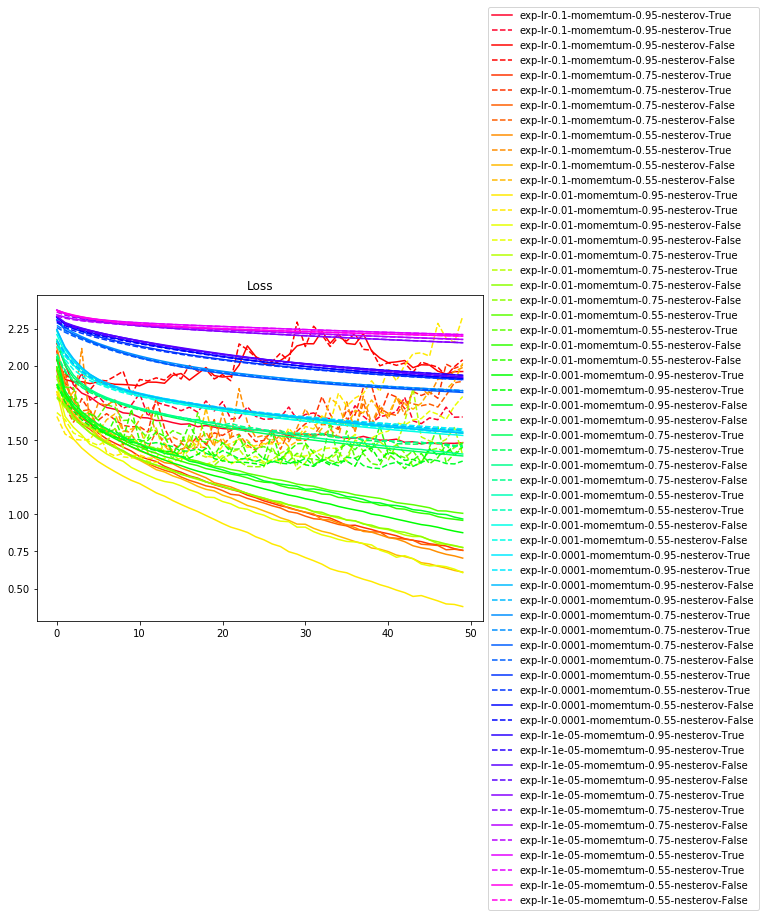

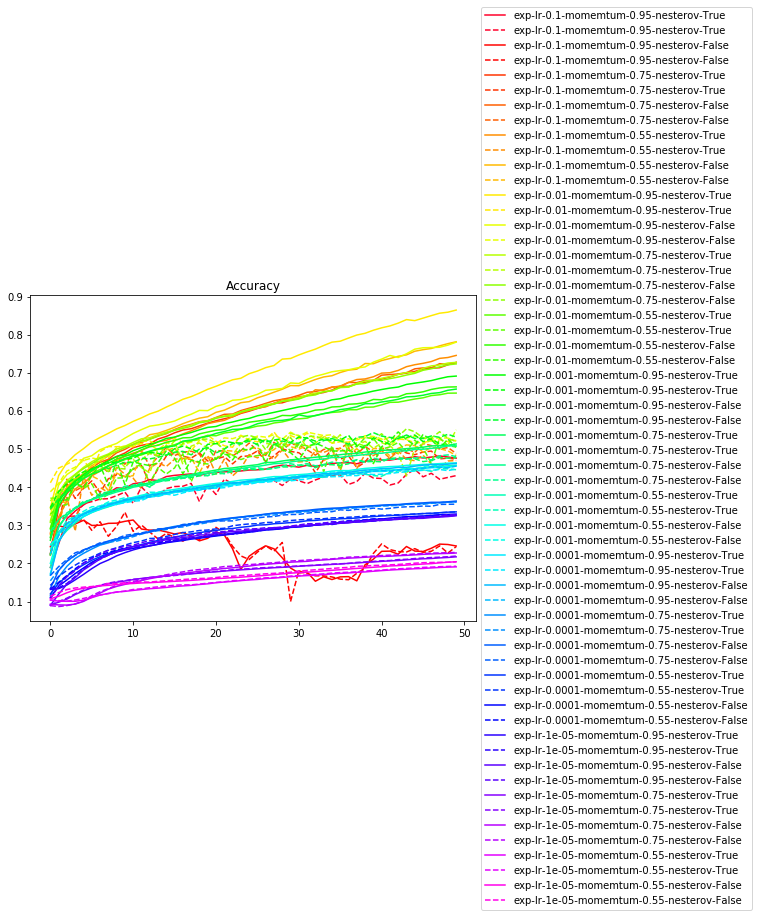

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()